In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drugData = pd.read_csv(mouse_drug_data_to_load)
clinicalData = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df = pd.merge(clinicalData, drugData, on='Mouse ID')

# Display the data table for preview
df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped = df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
grouped = grouped.reset_index()
# Preview DataFrame
grouped.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_df = df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
sem_df = sem_df.reset_index()
# Preview DataFrame
sem_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
munge = grouped.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
munge.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Total Volume Sem Munge, needed for Errors
mungeSem = sem_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
mungeSem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


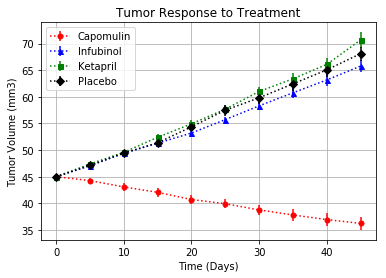

In [6]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
toPlot = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers = ['o', '^', 's', 'D']
colors = ['red', 'blue', 'green', 'black']
errors = mungeSem[toPlot]
for i in range(len(toPlot)):
    munge[toPlot[i]].plot(yerr = errors[toPlot[i]],
                          grid = True,
                          title="Tumor Response to Treatment",
                          marker=markers[i],
                          color=colors[i],
                          markersize=5, 
                          linestyle=':')

plt.legend()
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

    
# Save the Figure
plt.savefig("Output/Treatment Response")

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meanMet = df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
# Convert to DataFrame
meanMet_df = pd.DataFrame(meanMet)
# Preview DataFrame
meanMet_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
semMet = df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
# Convert to DataFrame
semMet_df = pd.DataFrame(semMet)
# Preview DataFrame
semMet_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
meanMet = df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
meanMet = meanMet.reset_index()
meanMet_df = pd.DataFrame(meanMet)
meanMet_df.head()
mungeMeanMet = meanMet_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
mungeMeanMet.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
# Metastatic Sites Sem grouping, needed for errors
met_df = df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
met_df = met_df.reset_index()
met_df.head()
# and munging
mungeMet = met_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
mungeMet.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


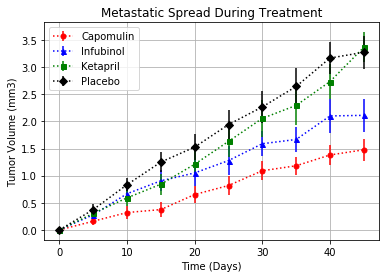

In [11]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
toPlot = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers = ['o', '^', 's', 'D']
colors = ['red', 'blue', 'green', 'black']
errors = mungeMet[toPlot]
for i in range(len(toPlot)):
    mungeMeanMet[toPlot[i]].plot(yerr = errors[toPlot[i]],
                          grid = True,
                          title="Metastatic Spread During Treatment",
                          marker=markers[i],
                          color=colors[i],
                          markersize=5, 
                          linestyle=':')

plt.legend()
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

    
# Save the Figure
plt.savefig("Output/Metastatic Spread")

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survivalRates = df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
# Convert to DataFrame
survivalRates = survivalRates.reset_index()
survivalRates.rename(columns={'Mouse ID': 'Mouse Count'}, inplace = True)
# Preview DataFrame
survivalRates.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
survivalMunge = survivalRates.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
# Preview the Data Frame
survivalMunge.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


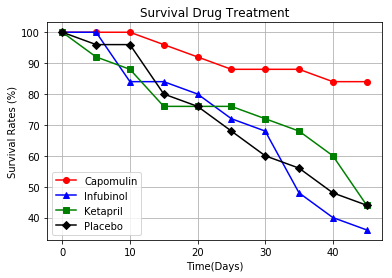

In [14]:
# Generate the Plot (Accounting for percentages)
for i in range(len(toPlot)):
    survivalPlot = (survivalMunge[toPlot[i]]*4).plot(title="Survival Drug Treatment", marker=markers[i], color=colors[i])

survivalPlot.legend()
survivalPlot.grid()
survivalPlot.set_xlabel('Time(Days)')
survivalPlot.set_ylabel('Survival Rates (%)')
# Save the Figure
plt.savefig("Output/Survival During Treatment")
# Show the Figure
plt.show()

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
summaryMunge = grouped.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Display the data to confirm
change = pd.DataFrame()
change['Drug'] = munge.columns
changeList = []
for drug in change['Drug']:
    changeList.append((summaryMunge[drug][45] / summaryMunge[drug][0] * 100) - 100)
change['Change'] = changeList
change

,Drug,Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [16]:
# Getting the relevant Drug changes
change.set_index('Drug', inplace = True)
changes = []
for drug in toPlot:
    changes.append(change.loc[drug]['Change'])
changes

[-19.475302667894155,
 46.123471727851836,
 57.028794686606034,
 51.29796048315151]

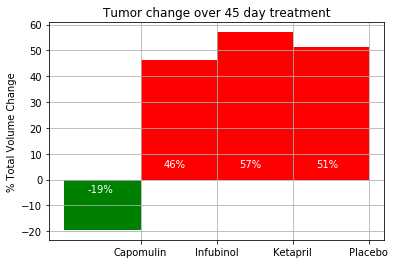

In [17]:
# And plotting

fig, ax = plt.subplots()

# color
for i in range(len(toPlot)):   
    if changes[i] < 0:
        color = 'green'
    else:
        color = 'red'
    finalPlot = ax.bar(x=toPlot[i], height=changes[i], color=color, width=1)

ax.grid() 
plt.title("Tumor change over 45 day treatment")
plt.xticks([0.5,1.5,2.5,3.5], labels=toPlot) 
plt.ylabel("% Total Volume Change")

for i in range(len(ax.patches)):
    # annotation positioning and formating
    
    if int(ax.patches[i].get_height()) < 0:
        ax.text(ax.patches[i].get_x() + ax.patches[i].get_width() / 3 - .03, -5, \
            str(int(changes[i])) + '%', fontsize = 10,
                color='white')
    else:
        ax.text(ax.patches[i].get_x() + ax.patches[i].get_width() / 3 - .03, 5, \
            str(int(changes[i])) + '%', fontsize = 10,
                color='white')
# saving      
plt.savefig('Output/Tumor_Change_Over_45_day_Treatment')
# boom, done